In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_excel('transactions_data.xlsx')
df.head()

,SALE_DATE,MODEL_YEAR,MAKE_NAME,MODEL_NAME,VEHICLE_NAME,SEGMENT,DATA_SOURCE,SALE_PRICE_AMOUNT,MSRP_AMOUNT,MILEAGE,...,DRIVETRAIN_DESCRIPTION,BEDLENGTH,BODY_STYLE,CAB_CONFIGURATION,DOOR_COUNT,TRUCK_FLG,TRANSACTION_GEOGRAPHY_ID,CITY_DISPLAY_NAME,STATE,SALE_TYPE
0,2016-12-31,2016,Kia,Soul,! Wagon 4D,Compact Car,VIN_SOLUTIONS,21903.86,22275,1,...,FWD,NaN,Wagon,NaN,4,NaN,37654,Montpelier,VT,Retail
1,2016-12-31,2017,Nissan,Murano,SL Sport Utility 4D,Midsize SUV Crossover,VIN_SOLUTIONS,38094.00,38930,10,...,AWD,NaN,SUV,NaN,4,NaN,35015,Corpus Christi,TX,Retail
2,2016-12-31,2016,Chevrolet,Cruze Limited,2LT Sedan 4D,Compact Car,VIN_SOLUTIONS,24413.00,27090,9,...,FWD,NaN,Sedan,NaN,4,NaN,36058,Georgetown,TX,Retail
3,2016-12-31,2017,Buick,LaCrosse,Premium Sedan 4D,Midsize Car,KEN_GARFF,43917.21,46972,44,...,FWD,NaN,Sedan,NaN,4,NaN,36567,Humble,TX,Retail
4,2016-12-31,2017,Honda,CR-V,EX Sport Utility 4D,Compact SUV Crossover,VIN_SOLUTIONS,28100.00,28895,12,...,AWD,NaN,SUV,NaN,4,NaN,19160,Rochester,MN,Retail


### Cleaning up the data

Rename the columns to lowercase and drop useless columns

In [3]:
df = (df.rename(columns=str.lower)
     .drop(['engine_subtype', 'bedlength', 'cab_configuration', 'truck_flg'], axis=1)
     .dropna(subset=['city_display_name']))

Let's check for null values

In [4]:
df.isnull().sum()

sale_date                       0
model_year                      0
make_name                       0
model_name                      0
vehicle_name                    0
segment                         0
data_source                     0
sale_price_amount               0
msrp_amount                     0
mileage                         0
days_in_inventory              75
transmission_description        0
transmission_num_of_speeds    581
transmission_type              30
engine_description              0
engine_cylinders               16
engine_displacement            16
engine_type                     0
drivetrain_description          0
body_style                      0
door_count                      0
transaction_geography_id        0
city_display_name               0
state                           0
sale_type                       0
dtype: int64

For days_in_inventory, we can just fill the nulls with the mean value

In [5]:
df.days_in_inventory = df.days_in_inventory.fillna(value=df.days_in_inventory.mean())

In [6]:
df.loc[df.transmission_type.isnull(), ['model_name', 'transmission_description']]

,model_name,transmission_description
116,Volt,Single-Speed Fixed Gear
180,Volt,Single-Speed Fixed Gear
244,Volt,Single-Speed Fixed Gear
265,7 Series,"Automatic, 8-Spd Sport w/Sport & Manual Modes"
308,Volt,Single-Speed Fixed Gear
393,7 Series,"Automatic, 8-Spd Sport w/Sport & Manual Modes"
436,Volt,Single-Speed Fixed Gear
746,7 Series,"Automatic, 8-Spd Sport w/Sport & Manual Modes"
807,X5,"Automatic, 8-Spd Steptronic w/Adaptive Control..."
823,X5,"Automatic, 8-Spd Steptronic w/Adaptive Control..."


Looks like the vehicles that are missing transmission types are hybrids, electric vehicles, and some BMWs (must be a data issue). We can just assume these are automatics.

In [7]:
df.transmission_type = df.transmission_type.fillna(value='Automatic')

In [8]:
df.loc[df.transmission_num_of_speeds.isnull(), ['transmission_description']]

,transmission_description
1,"Automatic, Xtronic CVT"
4,"Automatic, CVT"
7,"Automatic, CVT"
19,"Automatic, CVT"
23,"Automatic, CVT w/Manual Mode"
28,"Automatic, eCVT"
35,"Automatic, CVT"
36,"Automatic, CVT"
37,"Automatic, CVT w/Xtronic"
38,"Automatic, CVT"


A lot of vehicles are missing the number of speeds for the transmission because they are CVTs. We can just assume they have 0 speeds. However, some have the number of speeds in the description which we can use to extract and fill the nulls.

In [9]:
cond = (df.transmission_num_of_speeds.isnull()) & (df.transmission_description.str.contains('\d'))
df.loc[cond, 'transmission_num_of_speeds'] = df.loc[cond, 'transmission_description'].str.extract('(\d)')

df.transmission_num_of_speeds = df.transmission_num_of_speeds.fillna(1)

C:\Users\Will\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [10]:
df.loc[(df.engine_cylinders.isnull()) | (df.engine_displacement.isnull()), 'model_name'].value_counts()

Volt       13
Bolt EV     2
LEAF        1
Name: model_name, dtype: int64

Vehicles that are missing either the engine cylinders or the displacement are hybrids and EVs. While hybrids do have gasoline engines with cylinders and displacement, we can just assume 0.

In [11]:
df.loc[df.engine_cylinders.isnull(), ['engine_cylinders']] = 0
df.loc[df.engine_displacement.isnull(), 'engine_displacement'] = 0

In [12]:
df.isnull().sum()

sale_date                     0
model_year                    0
make_name                     0
model_name                    0
vehicle_name                  0
segment                       0
data_source                   0
sale_price_amount             0
msrp_amount                   0
mileage                       0
days_in_inventory             0
transmission_description      0
transmission_num_of_speeds    0
transmission_type             0
engine_description            0
engine_cylinders              0
engine_displacement           0
engine_type                   0
drivetrain_description        0
body_style                    0
door_count                    0
transaction_geography_id      0
city_display_name             0
state                         0
sale_type                     0
dtype: int64

Since transmission type is binary (automatic or manual), we can just transform it to a numerical label using LabelEncoder.

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['transmission_type_le'] = le.fit_transform(df.transmission_type.values)

In [14]:
df.engine_type.value_counts()

Gas              1706
Flexible Fuel     130
Hybrid             76
Diesel             71
Electric            3
Name: engine_type, dtype: int64

We can do the same for engine type, but since it has more than 2 labels we'll have to create dummy variables.

In [15]:
eng_type = pd.get_dummies(df.engine_type)
df = pd.concat([df, eng_type], axis=1)
df.head()

,sale_date,model_year,make_name,model_name,vehicle_name,segment,data_source,sale_price_amount,msrp_amount,mileage,...,transaction_geography_id,city_display_name,state,sale_type,transmission_type_le,Diesel,Electric,Flexible Fuel,Gas,Hybrid
0,2016-12-31,2016,Kia,Soul,! Wagon 4D,Compact Car,VIN_SOLUTIONS,21903.86,22275,1,...,37654,Montpelier,VT,Retail,0,0,0,0,1,0
1,2016-12-31,2017,Nissan,Murano,SL Sport Utility 4D,Midsize SUV Crossover,VIN_SOLUTIONS,38094.00,38930,10,...,35015,Corpus Christi,TX,Retail,0,0,0,0,1,0
2,2016-12-31,2016,Chevrolet,Cruze Limited,2LT Sedan 4D,Compact Car,VIN_SOLUTIONS,24413.00,27090,9,...,36058,Georgetown,TX,Retail,0,0,0,0,1,0
3,2016-12-31,2017,Buick,LaCrosse,Premium Sedan 4D,Midsize Car,KEN_GARFF,43917.21,46972,44,...,36567,Humble,TX,Retail,0,0,0,0,1,0
4,2016-12-31,2017,Honda,CR-V,EX Sport Utility 4D,Compact SUV Crossover,VIN_SOLUTIONS,28100.00,28895,12,...,19160,Rochester,MN,Retail,0,0,0,0,1,0


## Exploratory Data Analysis

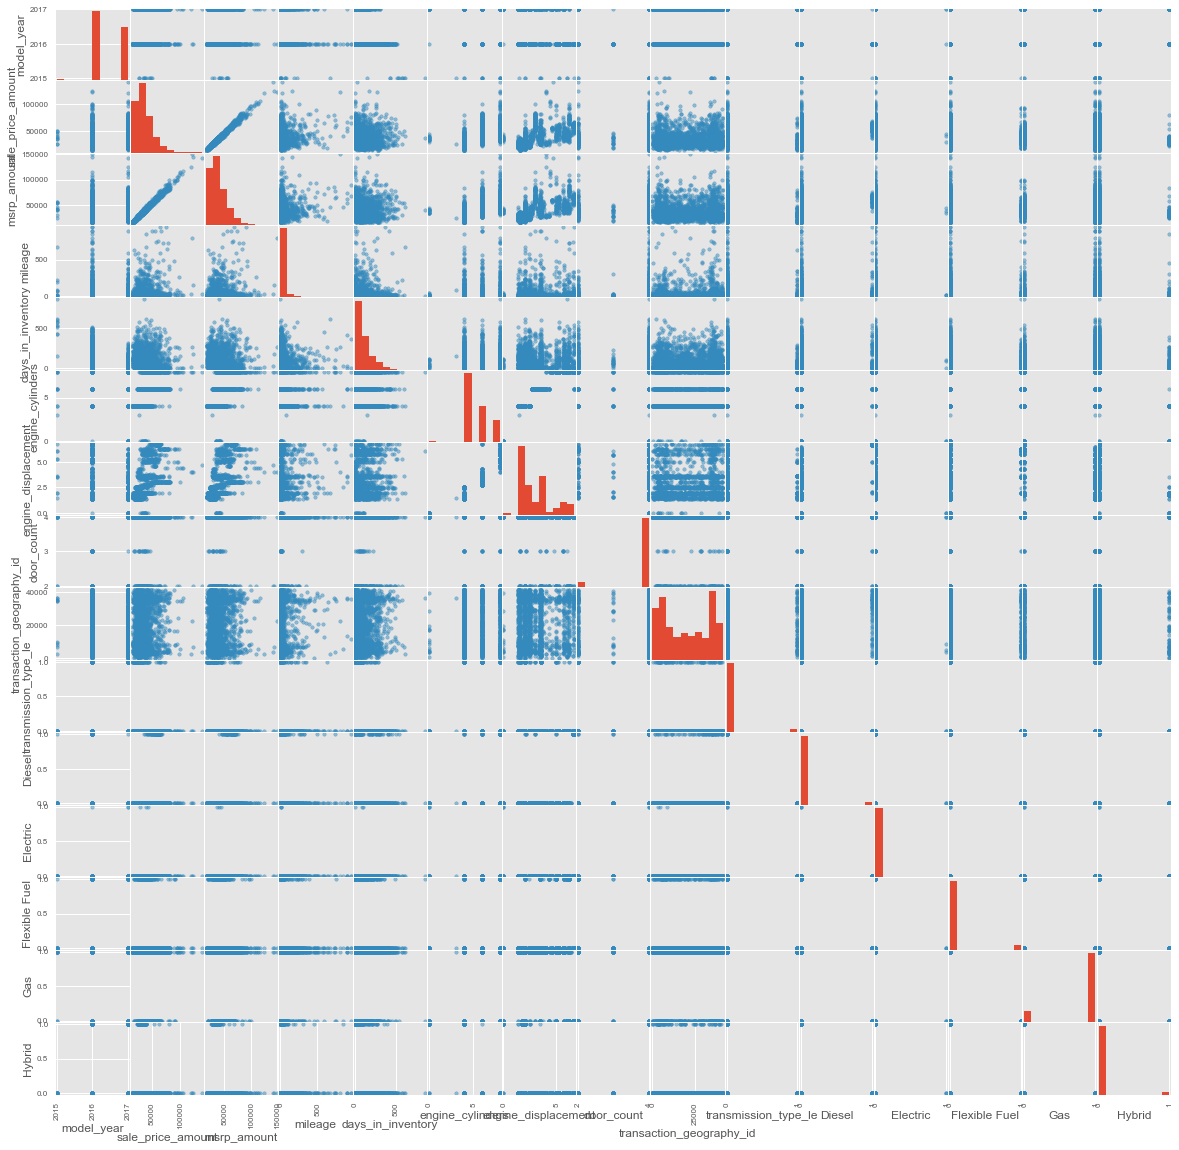

In [16]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(df, figsize=(20,20));

In [17]:
df.columns

Index(['sale_date', 'model_year', 'make_name', 'model_name', 'vehicle_name',
       'segment', 'data_source', 'sale_price_amount', 'msrp_amount', 'mileage',
       'days_in_inventory', 'transmission_description',
       'transmission_num_of_speeds', 'transmission_type', 'engine_description',
       'engine_cylinders', 'engine_displacement', 'engine_type',
       'drivetrain_description', 'body_style', 'door_count',
       'transaction_geography_id', 'city_display_name', 'state', 'sale_type',
       'transmission_type_le', 'Diesel', 'Electric', 'Flexible Fuel', 'Gas',
       'Hybrid'],
      dtype='object')

In [18]:
cols = ['Diesel','Electric','Flexible Fuel', 'Gas', 'Hybrid','transmission_type_le','door_count', 'engine_displacement', 'engine_cylinders', 'days_in_inventory', 'mileage', 'msrp_amount', 'model_year', 'sale_price_amount']

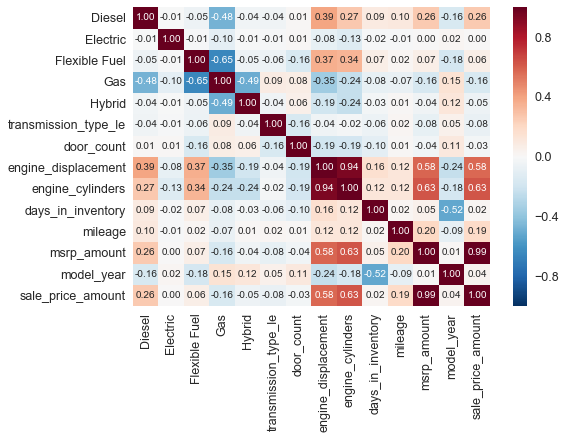

In [19]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                fmt='.2f',
                annot_kws={'size': 10},
                yticklabels=cols,
                xticklabels=cols)

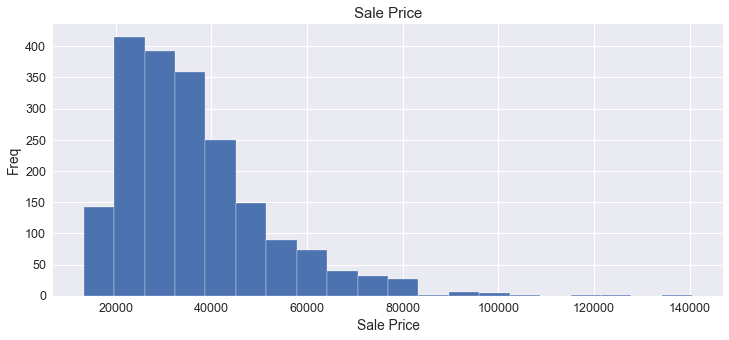

In [24]:
fig, ax = plt.subplots(figsize=(12,5))

ax.hist(df.sale_price_amount, 20, edgecolor='w')

plt.xlabel('Sale Price')
plt.ylabel('Freq')
plt.title('Sale Price');

In [26]:
df.columns

Index(['sale_date', 'model_year', 'make_name', 'model_name', 'vehicle_name',
       'segment', 'data_source', 'sale_price_amount', 'msrp_amount', 'mileage',
       'days_in_inventory', 'transmission_description',
       'transmission_num_of_speeds', 'transmission_type', 'engine_description',
       'engine_cylinders', 'engine_displacement', 'engine_type',
       'drivetrain_description', 'body_style', 'door_count',
       'transaction_geography_id', 'city_display_name', 'state', 'sale_type',
       'transmission_type_le', 'Diesel', 'Electric', 'Flexible Fuel', 'Gas',
       'Hybrid'],
      dtype='object')

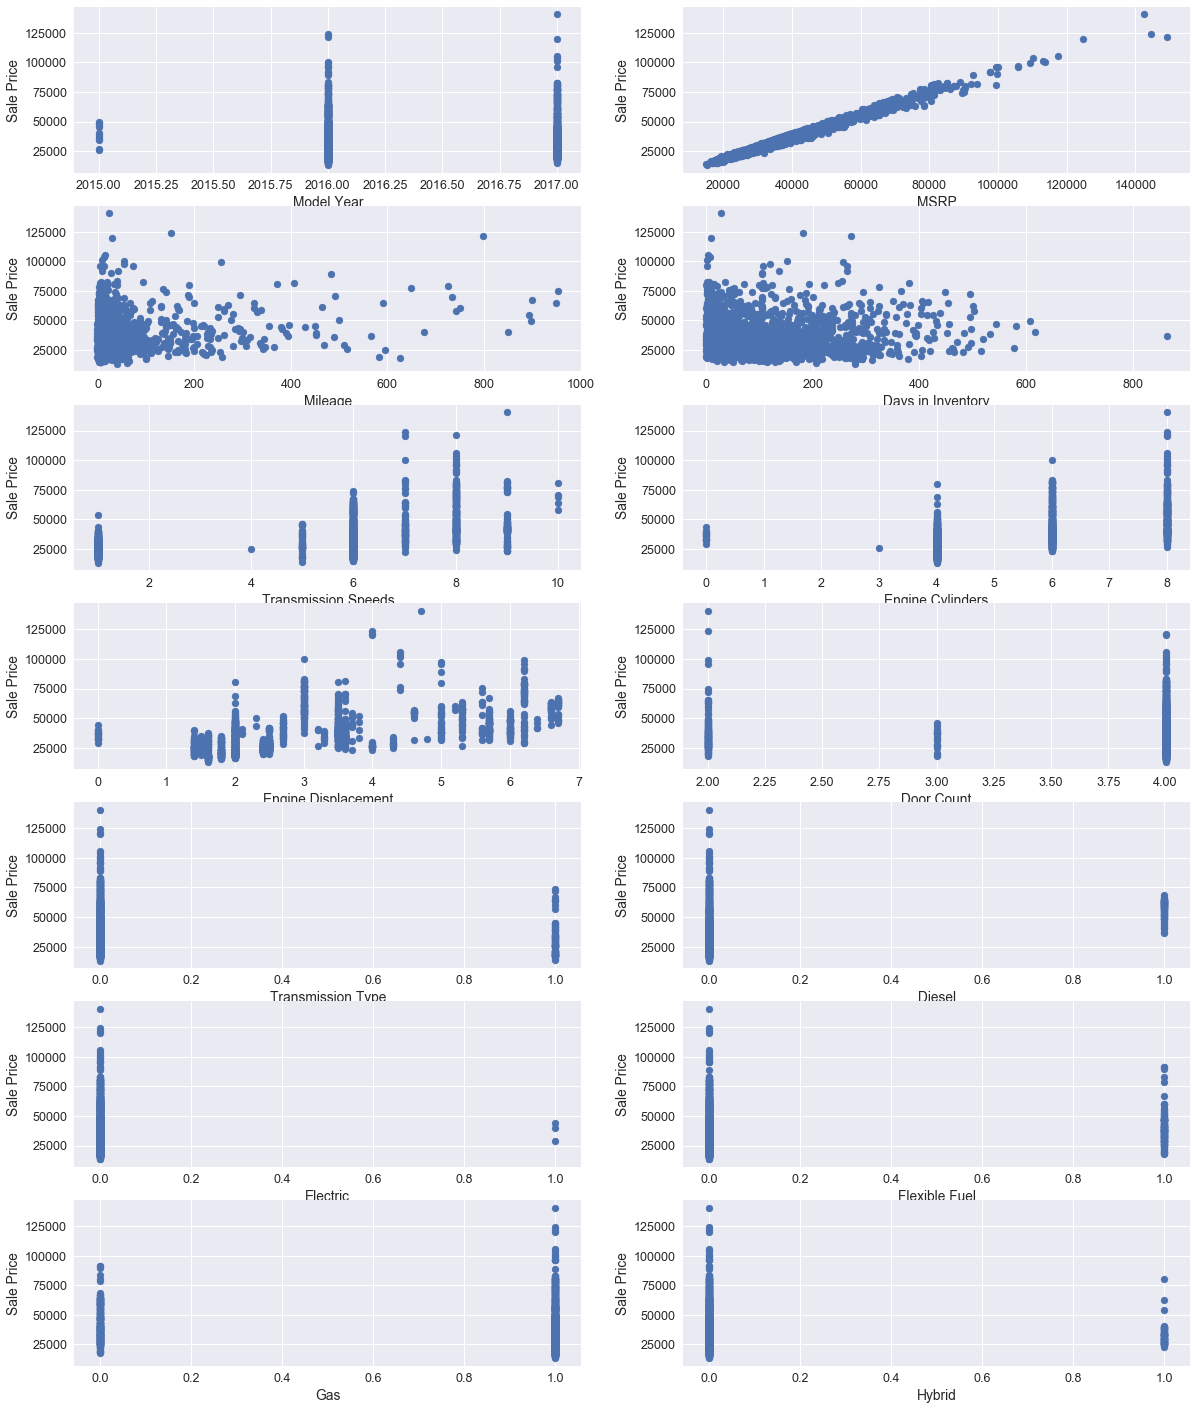

In [31]:
plot_columns = ['model_year', 'msrp_amount', 'mileage', 'days_in_inventory',
                'transmission_num_of_speeds', 'engine_cylinders', 'engine_displacement',
                'door_count', 'transmission_type_le', 'Diesel', 'Electric', 'Flexible Fuel',
               'Gas', 'Hybrid']

fig, ax = plt.subplots(7, 2, figsize=(20,25))
# plt.tight_layout()
ax[0][0].scatter(df.model_year, df.sale_price_amount)
ax[0][0].set_xlabel('Model Year')
ax[0][0].set_ylabel('Sale Price')
ax[0][1].scatter(df.msrp_amount, df.sale_price_amount)
ax[0][1].set_xlabel('MSRP')
ax[0][1].set_ylabel('Sale Price')
ax[1][0].scatter(df.mileage, df.sale_price_amount)
ax[1][0].set_xlabel('Mileage')
ax[1][0].set_ylabel('Sale Price');
ax[1][1].scatter(df.days_in_inventory, df.sale_price_amount)
ax[1][1].set_xlabel('Days in Inventory')
ax[1][1].set_ylabel('Sale Price')
ax[2][0].scatter(df.transmission_num_of_speeds, df.sale_price_amount)
ax[2][0].set_xlabel('Transmission Speeds')
ax[2][0].set_ylabel('Sale Price')
ax[2][1].scatter(df.engine_cylinders, df.sale_price_amount)
ax[2][1].set_xlabel('Engine Cylinders')
ax[2][1].set_ylabel('Sale Price')
ax[3][0].scatter(df.engine_displacement, df.sale_price_amount)
ax[3][0].set_xlabel('Engine Displacement')
ax[3][0].set_ylabel('Sale Price')
ax[3][1].scatter(df.door_count, df.sale_price_amount)
ax[3][1].set_xlabel('Door Count')
ax[3][1].set_ylabel('Sale Price')
ax[4][0].scatter(df.transmission_type_le, df.sale_price_amount)
ax[4][0].set_xlabel('Transmission Type')
ax[4][0].set_ylabel('Sale Price')
ax[4][1].scatter(df.Diesel, df.sale_price_amount)
ax[4][1].set_xlabel('Diesel')
ax[4][1].set_ylabel('Sale Price')
ax[5][0].scatter(df.Electric, df.sale_price_amount)
ax[5][0].set_xlabel('Electric')
ax[5][0].set_ylabel('Sale Price')
ax[5][1].scatter(df['Flexible Fuel'], df.sale_price_amount)
ax[5][1].set_xlabel('Flexible Fuel')
ax[5][1].set_ylabel('Sale Price')
ax[6][0].scatter(df.Gas, df.sale_price_amount)
ax[6][0].set_xlabel('Gas')
ax[6][0].set_ylabel('Sale Price')
ax[6][1].scatter(df.Hybrid, df.sale_price_amount)
ax[6][1].set_xlabel('Hybrid')
ax[6][1].set_ylabel('Sale Price');


In [45]:
name = df.make_name.unique()
name.sort()
name

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hyundai',
       'INFINITI', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus',
       'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan',
       'Porsche', 'Ram', 'Subaru', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

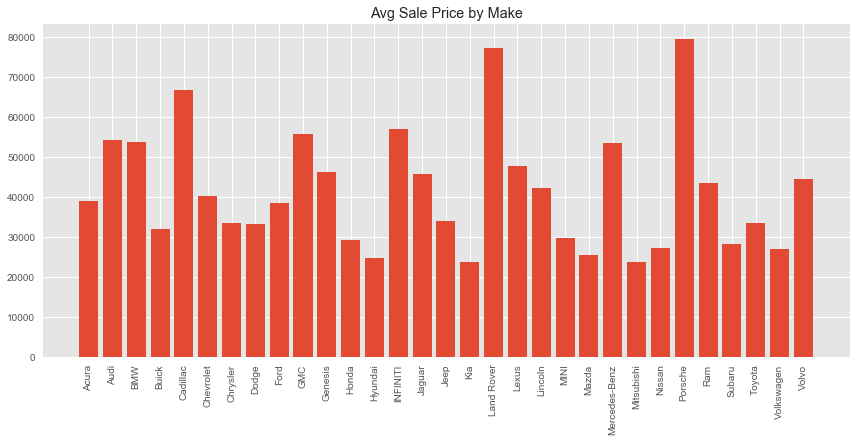

In [52]:
make = df.groupby('make_name')
ind = np.arange(len(make))
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(ind,make.sale_price_amount.mean())
ax.set_xticks(ind);
ax.set_xticklabels(name,rotation='vertical')
plt.tight_layout()
plt.title('Avg Sale Price by Make');

In [57]:
body_name = df.body_style.unique()
body_name.sort()

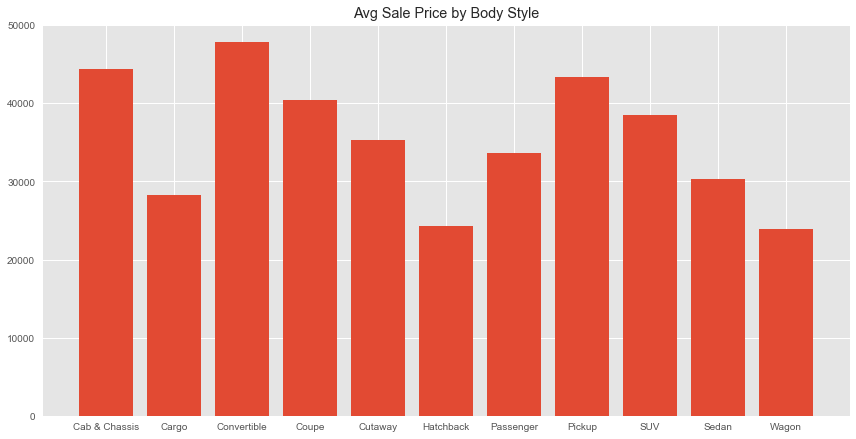

In [59]:
body = df.groupby('body_style')
ind = np.arange(len(body))
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(ind,body.sale_price_amount.mean())
ax.set_xticks(ind);
ax.set_xticklabels(body_name)
plt.tight_layout()
plt.title('Avg Sale Price by Body Style');

### Training The Model

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[cols].iloc[:, :-1].values
y = df['sale_price_amount'].values
# y = np.log(df.sale_price_amount.values)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(Xtrain, ytrain)
ytrain_pred = slr.predict(Xtrain)
ytest_pred = slr.predict(Xtest)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

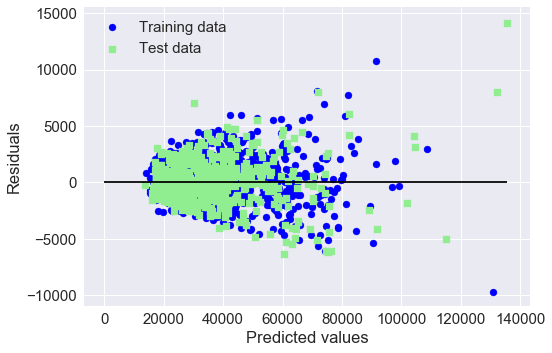

In [33]:
plt.scatter(ytrain_pred, ytrain_pred - ytrain,
           c = 'blue', marker='o', label='Training data')
plt.scatter(ytest_pred, ytest_pred - ytest,
           c = 'lightgreen', marker='s', label='Test data')
plt.hlines(y = 0, xmin= 0, xmax= ytest_pred.max())
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend();

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
train_score = slr.score(Xtrain, ytrain)
test_score = slr.score(Xtest, ytest)
print('Training score: {}'.format(train_score))
print('Test score: {}'.format(test_score))
print('MSE Training: {}, MES Test: {}'.format(mean_squared_error(ytrain, ytrain_pred), mean_squared_error(ytest, ytest_pred)))
print('R2 Score train: {} /nR2 Score test: {}'.format(r2_score(ytrain, ytrain_pred), r2_score(ytest, ytest_pred)))

Training score: 0.986650576960225
Test score: 0.9841222922087598
MSE Training: 2977463.575845518, MES Test: 4051225.5904479963
R2 Score train: 0.9866505769602248 /nR2 Score test: 0.9841222922087598


In [45]:
slr.coef_
slr.intercept_

array([ -4.31149936e+02,   1.06980318e+03,  -1.43448111e+02,
        -1.68642207e+02,  -3.26562924e+02,  -1.95435587e+02,
         1.10865149e+02,  -2.11874318e+02,   2.64755653e+02,
        -2.31531024e+00,  -1.16326970e+00,   9.08051812e-01,
         3.50632015e+02])

-706923.70120123192

In [42]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(slr, X, y,cv=10)
score
np.mean(score)

array([ 0.98482147,  0.98711728,  0.98507228,  0.98870645,  0.98567947,
        0.98570803,  0.98381942,  0.98113478,  0.98424805,  0.98568358])

0.98519908156713798

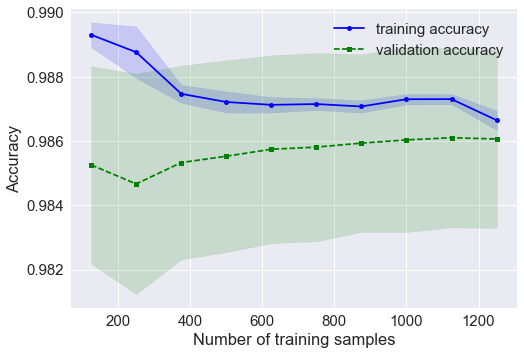

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve

pipe_lr = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA()),
                   ('lm', LinearRegression())])
pipe_lr.fit(Xtrain, ytrain)
pipe_lr.score(Xtest, ytest)
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                       X=Xtrain,
                                                       y=ytrain,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid(b=True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend();

### Training a KNeighborsRegression

In [47]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()
kn.fit(Xtrain, ytrain)
ypred_train = kn.predict(Xtrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [50]:
kn.score(Xtest, ytest)

0.97974795769595491

In [51]:
kn.score(Xtrain, ytrain)

0.98577727369094392